In [ ]:
#importing weather data for Berlin
import pandas as pd
import requests
# URL of the webpage containing JSON data
url = "http://139.174.11.24/data?dataset=weatherdataforcities&start=2019-01-01&end=2023-12-31&cityName=Berlin"

# Fetch the data from the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse JSON data
    mein_data = response.json()

    # Convert the data to a DataFrame
    berl_df = pd.DataFrame.from_dict(mein_data , orient='index')

    # Reset the index to convert the timestamp to a column
    berl_df.reset_index(inplace=True)

else:
    print("Failed to fetch data. Status code:", response.status_code)





In [ ]:

# drop unwanted columns

berl_df = berl_df.drop(columns = ["index", "time","snow","cityName"])
berl_df
berl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    43824 non-null  float64
 1   dwpt    43824 non-null  float64
 2   rhum    43824 non-null  float64
 3   prcp    43824 non-null  float64
 4   wdir    43824 non-null  float64
 5   wspd    43824 non-null  float64
 6   wpgt    43555 non-null  float64
 7   pres    43824 non-null  float64
 8   tsun    20529 non-null  float64
 9   coco    43579 non-null  float64
dtypes: float64(10)
memory usage: 3.3 MB


In [ ]:
#Checking for null values
berl_df.isnull().sum()

temp        0
dwpt        0
rhum        0
prcp        0
wdir        0
wspd        0
wpgt      269
pres        0
tsun    23295
coco      245
dtype: int64

In [ ]:
berl_df.head()

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco
0,7.9,6.8,93.0,0.0,250.0,19.1,28.0,1025.6,0.0,4.0
1,8.0,6.8,92.0,0.0,260.0,23.0,35.0,1024.7,0.0,7.0
2,7.9,6.2,89.0,0.0,260.0,22.7,42.0,1024.2,0.0,7.0
3,7.8,6.3,90.0,0.0,260.0,24.1,36.0,1022.7,0.0,7.0
4,7.5,6.1,91.0,0.2,260.0,29.2,48.0,1021.2,0.0,7.0


In [ ]:
# find the percentage of missing values in each feature
berl_df.isnull().sum()/len(berl_df) *100

temp     0.000000
dwpt     0.000000
rhum     0.000000
prcp     0.000000
wdir     0.000000
wspd     0.000000
wpgt     0.613819
pres     0.000000
tsun    53.155805
coco     0.559054
dtype: float64

In [ ]:
mask_nntsun = berl_df['tsun'].isnull()
berl_df[mask_nntsun]

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco
20529,10.6,2.4,57.0,0.0,241.0,33.3,55.5,998.2,NaN,3.0
20530,10.2,1.8,56.0,0.2,245.0,33.3,59.3,998.6,NaN,17.0
20531,10.2,1.8,56.0,0.2,245.0,37.0,63.0,998.7,NaN,17.0
20532,10.4,2.0,56.0,0.3,247.0,38.9,66.7,999.1,NaN,17.0
20533,10.7,1.5,53.0,0.2,250.0,38.9,66.7,999.2,NaN,17.0
...,...,...,...,...,...,...,...,...,...,...
43819,6.4,3.7,83.0,0.0,170.0,14.8,27.8,1003.5,NaN,3.0
43820,6.3,3.5,82.0,0.0,177.0,14.8,27.8,1003.8,NaN,3.0
43821,6.0,3.5,84.0,0.0,185.0,14.8,27.8,1004.1,NaN,3.0
43822,5.8,3.5,85.0,0.0,190.0,14.8,25.9,1004.2,NaN,3.0


In [ ]:
# Check if -99999 exists in all columns and print columns where it exists
columns_with_value = berl_df.apply(lambda col: col.name if -99999 in col.values else None).dropna()

if len(columns_with_value) > 0:
    print(f"The value '{-99999}' exists in the following columns:")
    for col in columns_with_value:
        print(col)
else:
    print(f"The value '{-99999}' does not exist in any column.")

The value '-99999' does not exist in any column.


In [ ]:
#Using Linear Regression Imputation to fill missing values in the tsun feature
from sklearn.linear_model import LinearRegression

# seperate the null  values of the tsun feature
test =  berl_df[berl_df["tsun"].isnull()]
X_test = test.drop(columns = ["tsun","coco","wpgt"] )

#Dropping the null values from the dataset
train = berl_df.dropna()
#Splitting the train data into target and feature
X_train= train.drop(columns = ["tsun","coco","wpgt"])
y_train = train["tsun"]

#Calling the linear regression model
lr = LinearRegression()
#Fitting the tranining data in to the model
lr.fit(X_train, y_train)
#Predicting the missing tsun values
y_pred = lr.predict(X_test)

#Replacing the missing values with the model prediction
berl_df.loc[berl_df.tsun.isnull(),"tsun"] = y_pred

In [ ]:
# seperate the null  values of the coco feature
test_coco =  berl_df[berl_df["coco"].isnull()]
X_test_coco = test_coco.drop(columns = ["coco","wpgt"])

train_coco = berl_df.dropna()
X_train_coco= train_coco.drop(columns = ["coco","wpgt"])
y_train_coco = train_coco["coco"]
lr2 = LinearRegression()
lr2.fit(X_train_coco, y_train_coco)
#Predicting the missing coco values
y_pred2 = lr2.predict(X_test_coco)

#Replacing the missing values with the model prediction
berl_df.loc[berl_df.coco.isnull(),"coco"] = y_pred2

In [ ]:
# seperate the null  values of the wpgt feature
test_wpgt =  berl_df[berl_df["wpgt"].isnull()]
X_test_wpgt = test_wpgt.drop(columns = ["wpgt"])

train_wpgt = berl_df.dropna()
X_train_wpgt= train_wpgt.drop(columns = ["wpgt"])
y_train_wpgt = train_wpgt["wpgt"]
lr3 = LinearRegression()
lr3.fit(X_train_wpgt, y_train_wpgt)
#Predicting the missing wpgt values
y_pred3 = lr3.predict(X_test_wpgt)

#Replacing the missing values with the model prediction
berl_df.loc[berl_df.wpgt.isnull(),"wpgt"] = y_pred3

In [ ]:
#Check if missing values still exists for the tsun feature
berl_df.isnull().sum()/len(berl_df) *100

temp    0.000000
dwpt    0.000000
rhum    0.000000
prcp    0.000000
wdir    0.000000
wspd    0.000000
wpgt    0.613819
pres    0.000000
tsun    0.000000
coco    0.559054
dtype: float64

In [ ]:
#Check if missing values still exists for the coco feature
berl_df.isnull().sum()/len(berl_df) *100


temp    0.0
dwpt    0.0
rhum    0.0
prcp    0.0
wdir    0.0
wspd    0.0
wpgt    0.0
pres    0.0
tsun    0.0
coco    0.0
dtype: float64

In [ ]:
#Check if missing values still exists for the wpgt feature
berl_df.isnull().sum()/len(berl_df) *100


temp    0.0
dwpt    0.0
rhum    0.0
prcp    0.0
wdir    0.0
wspd    0.0
wpgt    0.0
pres    0.0
tsun    0.0
coco    0.0
dtype: float64

In [ ]:

berl_df.isnull().sum()

temp    0
dwpt    0
rhum    0
prcp    0
wdir    0
wspd    0
wpgt    0
pres    0
tsun    0
coco    0
dtype: int64

In [ ]:
berl_df.describe()

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,11.270934,5.723483,72.104600,0.062183,201.980604,12.909331,23.465618,1015.549535,12.212607,3.950920
std,7.899581,6.030590,18.906194,0.366064,90.823449,6.949928,11.623753,9.777401,17.648934,3.306609
min,-15.100000,-16.300000,11.000000,0.000000,0.000000,0.000000,1.800000,978.400000,-7.276104,1.000000
25%,5.200000,1.300000,59.000000,0.000000,130.000000,7.400000,14.800000,1009.600000,0.000000,2.000000
50%,10.600000,5.800000,76.000000,0.000000,224.000000,11.200000,22.000000,1016.100000,4.169019,3.000000
75%,17.100000,10.400000,88.000000,0.000000,272.000000,16.700000,30.000000,1021.900000,17.345797,4.000000
max,38.400000,21.300000,100.000000,23.200000,360.000000,52.200000,103.000000,1047.300000,89.049868,26.000000


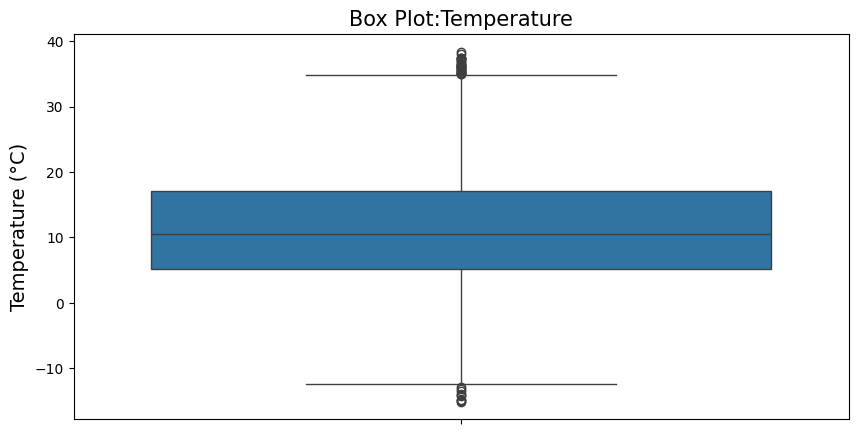

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,5))
sns.boxplot(berl_df.temp)
plt.title('Box Plot:Temperature', fontsize=15)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.show()

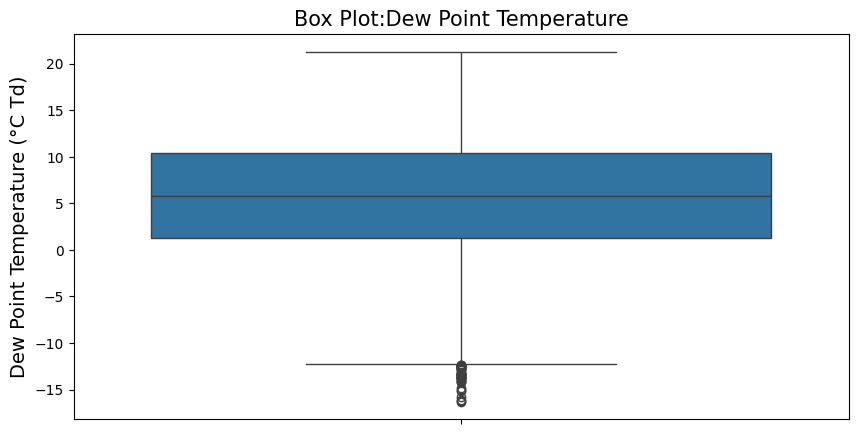

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(berl_df.dwpt)
plt.title('Box Plot:Dew Point Temperature', fontsize=15)
plt.ylabel('Dew Point Temperature (°C Td)', fontsize=14)
plt.show()

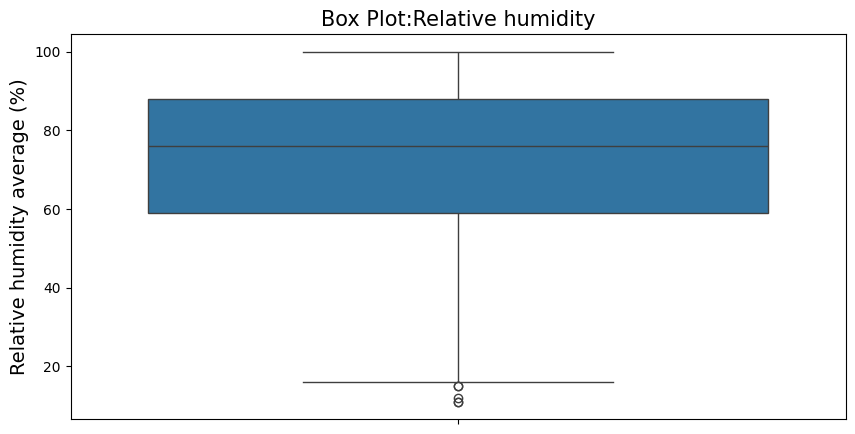

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(berl_df.rhum)
plt.title('Box Plot:Relative humidity', fontsize=15)
plt.ylabel('Relative humidity average (%)', fontsize=14)
plt.show()

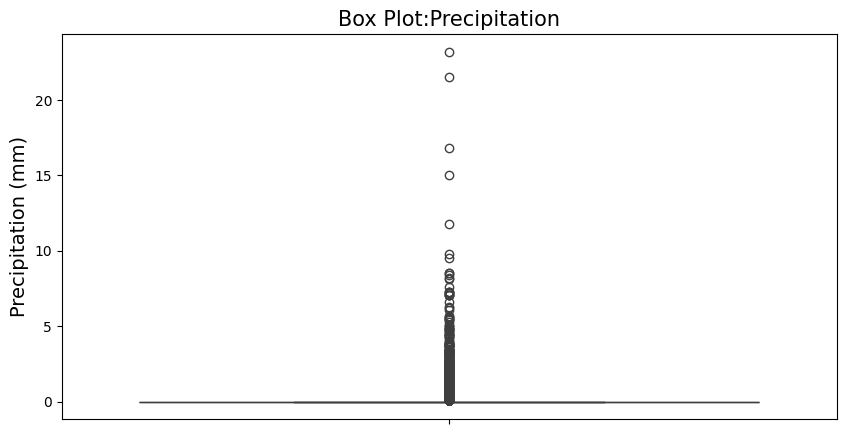

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(berl_df.prcp)
plt.title('Box Plot:Precipitation', fontsize=15)
plt.ylabel('Precipitation (mm)', fontsize=14)
plt.show()

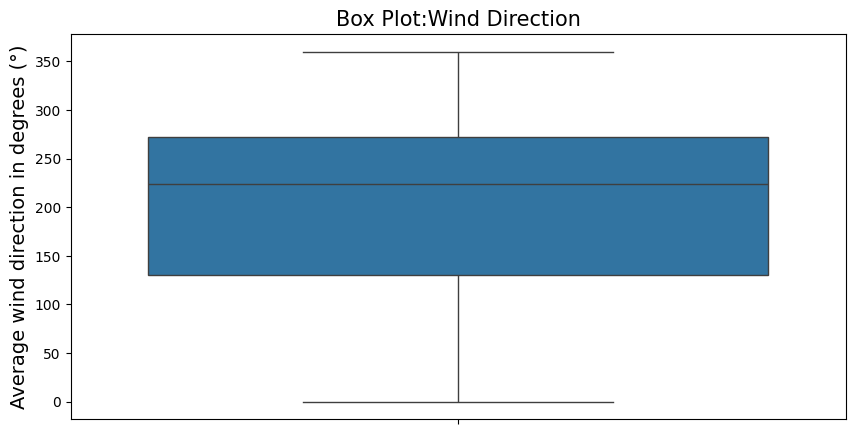

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(berl_df.wdir)
plt.title('Box Plot:Wind Direction', fontsize=15)
plt.ylabel('Average wind direction in degrees (°)', fontsize=14)
plt.show()

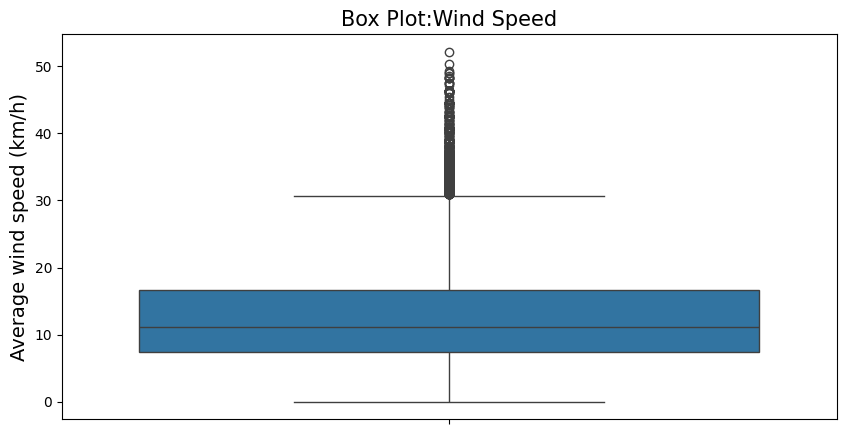

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(berl_df.wspd)
plt.title('Box Plot:Wind Speed', fontsize=15)
plt.ylabel('Average wind speed (km/h)', fontsize=14)
plt.show()

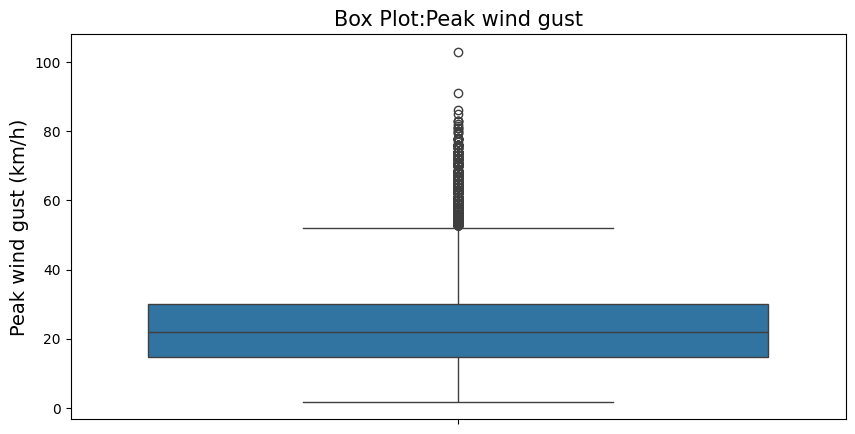

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(berl_df.wpgt)
plt.title('Box Plot:Peak wind gust', fontsize=15)
plt.ylabel('Peak wind gust (km/h)', fontsize=14)
plt.show()

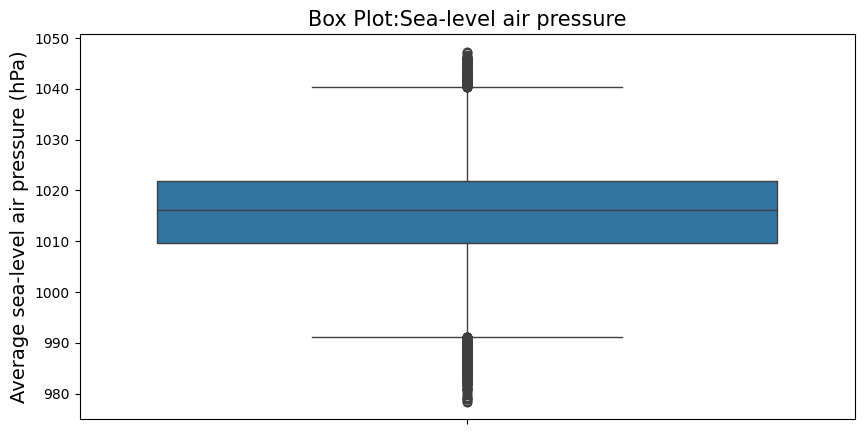

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(berl_df.pres)
plt.title('Box Plot:Sea-level air pressure', fontsize=15)
plt.ylabel('Average sea-level air pressure (hPa)', fontsize=14)
plt.show()

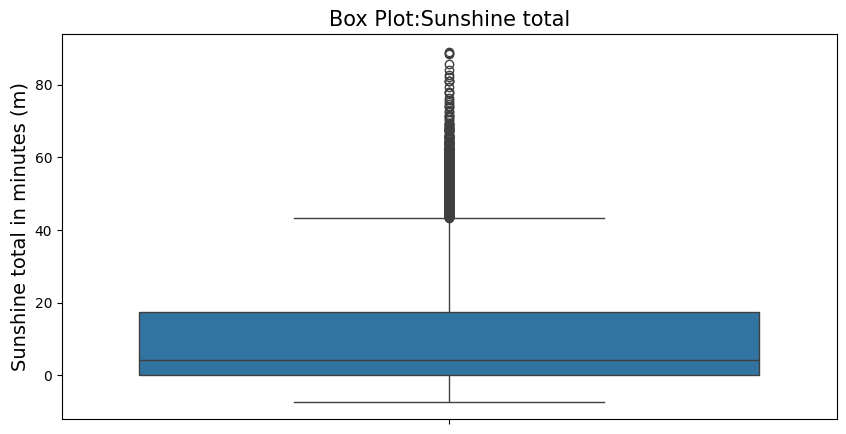

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(berl_df.tsun)
plt.title('Box Plot:Sunshine total', fontsize=15)
plt.ylabel('Sunshine total in minutes (m)', fontsize=14)
plt.show()

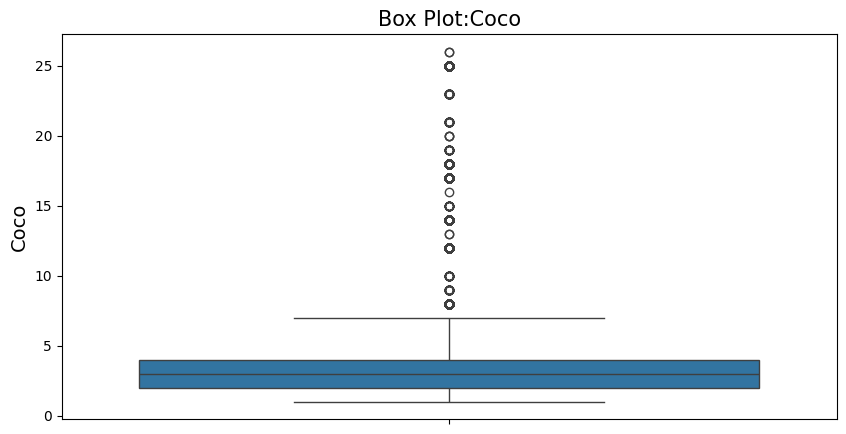

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(berl_df.coco)
plt.title('Box Plot:Coco', fontsize=15)
plt.ylabel('Coco', fontsize=14)
plt.show()

LOF FOR BERLIN WEATHER DATASET

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor


# Number of neighbors for LOF
n_neighbors = 20
contamination = 0.10
# Dictionary to store the percentage of outliers for each feature
outlier_percentages = {}

# Apply LOF to each feature
for feature in berl_df.columns:
# Reshape the data for LOF
 X = berl_df[[feature]].values

 # Fit the LOF model
 lof = LocalOutlierFactor(n_neighbors=n_neighbors)
 y_pred = lof.fit_predict(X)

 # Identify the outliers
 outliers = y_pred == -1

 # Calculate the percentage of outliers
 percentage_outliers = np.mean(outliers) * 100
 outlier_percentages[feature] = percentage_outliers

 print(f'Percentage of outliers in {feature} in Berlin weather data is {feature}: {percentage_outliers:.2f}%')

Percentage of outliers in temp in Berlin weather data is temp: 0.34%
Percentage of outliers in dwpt in Berlin weather data is dwpt: 0.19%
Percentage of outliers in rhum in Berlin weather data is rhum: 0.02%
Percentage of outliers in prcp in Berlin weather data is prcp: 0.15%
Percentage of outliers in wdir in Berlin weather data is wdir: 0.17%
Percentage of outliers in wspd in Berlin weather data is wspd: 0.30%
Percentage of outliers in wpgt in Berlin weather data is wpgt: 0.81%
Percentage of outliers in pres in Berlin weather data is pres: 0.62%
Percentage of outliers in tsun in Berlin weather data is tsun: 3.14%
Percentage of outliers in coco in Berlin weather data is coco: 0.31%


NAIVE BAYES MODEL ON WEATHER

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm


# Extract features
X = berl_df.values

# Fit Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X, np.zeros(X.shape[0]))  # Dummy target variable

# Calculate likelihoods for each data point
means = gnb.theta_
variances = gnb.var_
likelihoods = np.zeros(X.shape[0])

# Ensure means and variances are in correct shape
if means.ndim == 1:
    means = means.reshape(1, -1)
if variances.ndim == 1:
    variances = variances.reshape(1, -1)

# Calculate likelihoods for each data point
for i, x in enumerate(X):
    likelihood = 1
    for j in range(X.shape[1]):
        likelihood *= norm.pdf(x[j], loc=means[0][j], scale=np.sqrt(variances[0][j]))
    likelihoods[i] = likelihood

# Determine anomalies
threshold = np.percentile(likelihoods, 10)  # for example, consider the bottom 10% as anomalies
anomalies = np.where(likelihoods < threshold)[0]

# Calculate percentage of anomalies for each feature
anomalies_berl_df = berl_df.iloc[anomalies]
total_anomalies = len(anomalies)
total_data_points = len(berl_df)

# Calculate anomaly percentage for each feature
feature_anomalies_percentage = {}
for feature in berl_df.columns:
    feature_anomalies_count = (anomalies_berl_df[feature] != berl_df[feature].mode().iloc[0]).sum()
    feature_anomalies_percentage[feature] = (feature_anomalies_count / total_data_points) * 100

print("Number of anomalies detected:", total_anomalies)
print("Percentage of anomalies for each feature:")
for feature, percentage in feature_anomalies_percentage.items():
    print(f"{feature}: {percentage:.2f}%")


Number of anomalies detected: 4383
Percentage of anomalies for each feature:
temp: 9.96%
dwpt: 9.95%
rhum: 9.85%
prcp: 3.39%
wdir: 9.55%
wspd: 9.55%
wpgt: 9.76%
pres: 9.98%
tsun: 7.61%
coco: 9.25%


In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm



# Initialize a dictionary to store anomaly information for each feature
anomaly_info = {}

# Loop through each feature
for feature in berl_df.columns:
    # Extract the feature values
    X = berl_df[[feature]].values

    # Fit Gaussian Naive Bayes model
    gnb = GaussianNB()
    gnb.fit(X, np.zeros(X.shape[0]))  # Dummy target variable

    # Calculate likelihoods for each data point
    means = gnb.theta_
    variances = gnb.var_
    likelihoods = np.zeros(X.shape[0])

    # Ensure means and variances are in correct shape
    if means.ndim == 1:
        means = means.reshape(1, -1)
    if variances.ndim == 1:
        variances = variances.reshape(1, -1)

    # Calculate likelihoods for each data point
    for i, x in enumerate(X):
        likelihood = norm.pdf(x[0], loc=means[0][0], scale=np.sqrt(variances[0][0]))
        likelihoods[i] = likelihood

    # Determine anomalies using mean and standard deviation
    mean_likelihood = np.mean(likelihoods)
    std_likelihood = np.std(likelihoods)
    threshold = mean_likelihood - 2 * std_likelihood  # 2 standard deviations below the mean
    anomalies = np.where(likelihoods < threshold)[0]

    # Calculate percentage of anomalies for this feature
    total_anomalies = len(anomalies)
    total_data_points = len(berl_df)
    anomaly_percentage = (total_anomalies / total_data_points) * 100

    # Store the anomaly information
    anomaly_info[feature] = {
        'total_anomalies': total_anomalies,
        'anomaly_percentage': anomaly_percentage,
        'anomalies': anomalies
    }

# Print results
for feature, info in anomaly_info.items():
    print(f"Feature: {feature}")
    print(f"  Number of anomalies detected: {info['total_anomalies']}")
    print(f"  Percentage of anomalies: {info['anomaly_percentage']:.2f}%")



Feature: temp
  Number of anomalies detected: 1768
  Percentage of anomalies: 4.03%
Feature: dwpt
  Number of anomalies detected: 1798
  Percentage of anomalies: 4.10%
Feature: rhum
  Number of anomalies detected: 2249
  Percentage of anomalies: 5.13%
Feature: prcp
  Number of anomalies detected: 1681
  Percentage of anomalies: 3.84%
Feature: wdir
  Number of anomalies detected: 1404
  Percentage of anomalies: 3.20%
Feature: wspd
  Number of anomalies detected: 2608
  Percentage of anomalies: 5.95%
Feature: wpgt
  Number of anomalies detected: 2259
  Percentage of anomalies: 5.15%
Feature: pres
  Number of anomalies detected: 2820
  Percentage of anomalies: 6.43%
Feature: tsun
  Number of anomalies detected: 4300
  Percentage of anomalies: 9.81%
Feature: coco
  Number of anomalies detected: 1957
  Percentage of anomalies: 4.47%


AUTOENCODER MODEL

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential



#to save all features
features_auto_w = berl_df.columns.tolist()


# DataFrame to store anomaly scores for each feature
anomaly_scores_auto_w = pd.DataFrame(index=berl_df.index)

# Loop through each feature
for feature in features_auto_w :
    # Scale the feature data
    scaler = MinMaxScaler()
    scaled_feature_auto_w  = scaler.fit_transform(berl_df[[feature]])

    # Define the autoencoder model
    model_auto_w  = Sequential([
        Dense(32, activation='relu', input_shape=(1,)),
        Dense(16, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model_auto_w .compile(optimizer='adam', loss='mean_squared_error')

     #Train the autoencoder
    model_auto_w.fit(scaled_feature_auto_w , scaled_feature_auto_w , epochs=50, batch_size=32, validation_split=0.1, verbose=0)

    # Get reconstruction loss
    reconstructed_feature_auto_w  = model_auto_w.predict(scaled_feature_auto_w )
    reconstruction_loss_auto_w  = np.mean(np.square(scaled_feature_auto_w  - reconstructed_feature_auto_w ), axis=1)

    # Store the reconstruction loss (anomaly score) in the DataFrame
    anomaly_scores_auto_w [feature] = reconstruction_loss_auto_w



1370/1370 [==============================] - 3s 2ms/step


In [ ]:

print(reconstruction_loss_auto_w)
# Calculate the threshold as the 90th percentile of the reconstruction loss
threshold_auto_w = np.percentile(reconstruction_loss_auto_w, 90)

    # Identify anomalies
anomalies_auto_w = reconstruction_loss_auto_w > threshold_auto_w

for feature in features_auto_w:
    anomalies_auto_w = anomaly_scores_auto_w[feature] > threshold_auto_w
    anomaly_percentage_auto_w = np.mean(anomalies_auto_w) * 100
    print(f'Feature: {feature}, Anomaly Percentage: {anomaly_percentage_auto_w:.2f}%')


    # Store the reconstruction loss (anomaly score) in the DataFrame
anomaly_scores_auto_w[feature] = reconstruction_loss_auto_w


# Combine anomaly scores with original data for easier analysis
combined_data_auto_w = pd.concat([berl_df, anomaly_scores_auto_w.add_suffix('_anomaly_score')], axis=1)

# Save the combined data with anomaly scores
combined_data_auto_w.to_csv('berl_df_with_anomaly_scores.csv', index=False)

# Display the first few rows of the combined data
combined_data_auto_w.head()






XGBOOST ON WEATHER DATASET

In [ ]:

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Sample Data (Replace with your dataset)
# Assuming a dataframe with 100 rows and 10 features


# Define anomaly detection function
def detect_anomalies(Mun_df):
    anomalies = pd.DataFrame(index=Mun_df.index)
    anomaly_percentages = {}

    for feature in Mun_df.columns:
        X = Mun_df.drop(columns=[feature])
        y = Mun_df[feature]

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train XGBoost model
        model = XGBRegressor()
        model.fit(X_train, y_train)

        # Predict on the whole dataset
        y_pred = model.predict(X)

        # Calculate prediction errors
        errors = np.abs(y - y_pred)

        # Determine dynamic threshold using standard deviation
        mean_error = np.mean(errors)
        std_error = np.std(errors)
        threshold = mean_error + 2 * std_error  # Consider 2 standard deviations from the mean

        # Flag anomalies
        anomaly_flags = errors > threshold
        anomalies[feature] = anomaly_flags

        # Calculate anomaly percentage
        anomaly_percentages[feature] = (anomaly_flags.sum() / len(Mun_df)) * 100

        # Print summary
        print(f"Feature: {feature}")
        print(f"Threshold: {threshold:.4f}")
        print(f"Anomalies detected: {anomaly_flags.sum()}/{len(Mun_df)} ({anomaly_percentages[feature]:.2f}%)")
        print("-" * 40)

    return anomalies, anomaly_percentages

# Detect anomalies
anomalies_df, anomaly_percentages = detect_anomalies(berl_df)


# Print anomaly percentages
print("\nAnomaly Percentages per Feature:")
for feature, percentage in anomaly_percentages.items():
    print(f"{feature}: {percentage:.2f}%")


Feature: temp
Threshold: 0.3032
Anomalies detected: 1772/43824 (4.04%)
----------------------------------------
Feature: dwpt
Threshold: 0.3281
Anomalies detected: 1211/43824 (2.76%)
----------------------------------------
Feature: rhum
Threshold: 2.2862
Anomalies detected: 1713/43824 (3.91%)
----------------------------------------
Feature: prcp
Threshold: 0.3465
Anomalies detected: 1083/43824 (2.47%)
----------------------------------------
Feature: wdir
Threshold: 138.7257
Anomalies detected: 2304/43824 (5.26%)
----------------------------------------
Feature: wspd
Threshold: 2.5413
Anomalies detected: 1601/43824 (3.65%)
----------------------------------------
Feature: wpgt
Threshold: 4.3373
Anomalies detected: 1562/43824 (3.56%)
----------------------------------------
Feature: pres
Threshold: 10.9495
Anomalies detected: 2348/43824 (5.36%)
----------------------------------------
Feature: tsun
Threshold: 18.4674
Anomalies detected: 2320/43824 (5.29%)
-----------------------------

IRRADIATION DATASET


In [ ]:
import pandas as pd
import requests
#importing irradiation data for Meiningen
# URL of the webpage containing JSON data
url = "http://139.174.11.24/data?dataset=irradiationdataforcities&start=2019-01-01&end=2023-12-31&cityName=Berlin"

# Fetch the data from the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse JSON data
    data = response.json()

    # Convert the data to a DataFrame
    Berl_df_irrad = pd.DataFrame.from_dict(data, orient='index')


else:
    print("Failed to fetch data. Status code:", response.status_code)


In [ ]:
Berl_df_irrad.head(2)

,time,Observation period,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,GHI,BHI,DHI,BNI,Reliability,cityName
1546300800000,2019-01-01 00:00:00,2019-01-01T00:00:00.0/2019-01-01T00:15:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,Berlin
1546301700000,2019-01-01 00:15:00,2019-01-01T00:15:00.0/2019-01-01T00:30:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,Berlin


In [ ]:

# drop unwanted columns
Berl_clean_df = Berl_df_irrad.drop(columns = ["time", "Observation period", "Reliability", "cityName"])
Berl_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175296 entries, 1546300800000 to 1704066300000
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TOA            175296 non-null  object 
 1   Clear sky GHI  175296 non-null  object 
 2   Clear sky BHI  175296 non-null  object 
 3   Clear sky DHI  175296 non-null  object 
 4   Clear sky BNI  175296 non-null  object 
 5   GHI            175296 non-null  float64
 6   BHI            175296 non-null  object 
 7   DHI            175296 non-null  object 
 8   BNI            175296 non-null  object 
dtypes: float64(1), object(8)
memory usage: 13.4+ MB


In [ ]:
#Get the percentage of null values in the dataset
Berl_clean_df.isnull().sum() /len(Berl_clean_df) *(100)

TOA              0.0
Clear sky GHI    0.0
Clear sky BHI    0.0
Clear sky DHI    0.0
Clear sky BNI    0.0
GHI              0.0
BHI              0.0
DHI              0.0
BNI              0.0
dtype: float64

In [ ]:

# Check if -99999 exists in all columns and print columns where it exists
columns_with_value = Berl_clean_df.apply(lambda col: col.name if -99999 in col.values else None).dropna()

if len(columns_with_value) > 0:
    print(f"The value '{-99999}' exists in the following columns:")
    for col in columns_with_value:
        print(col)
else:
    print(f"The value '{-99999}' does not exist in any column.")

The value '-99999' does not exist in any column.


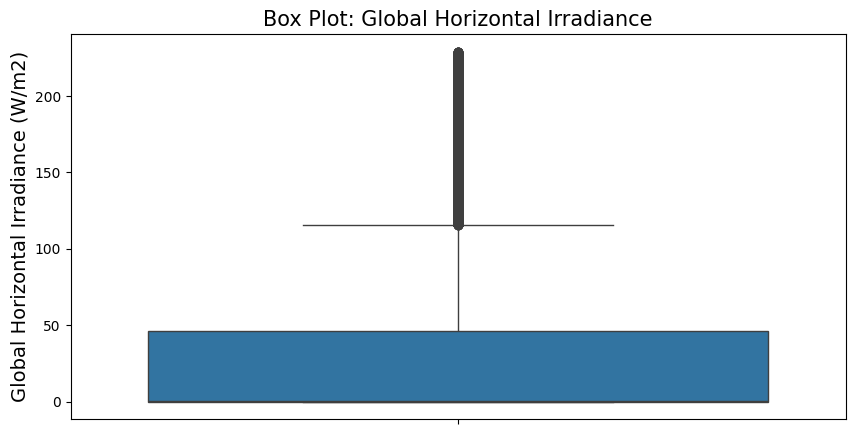

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(Berl_clean_df.GHI)
plt.title('Box Plot: Global Horizontal Irradiance', fontsize=15)
plt.ylabel('Global Horizontal Irradiance (W/m2)', fontsize=14)
plt.show()

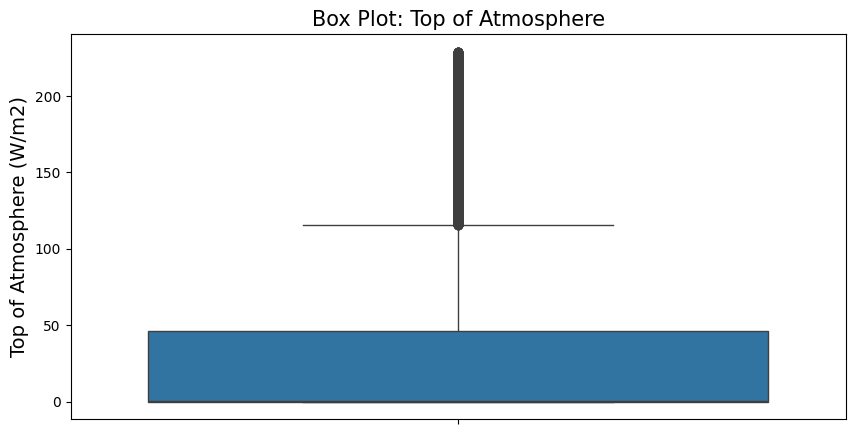

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(Berl_clean_df.GHI)
plt.title('Box Plot: Top of Atmosphere', fontsize=15)
plt.ylabel('Top of Atmosphere (W/m2)', fontsize=14)
plt.show()

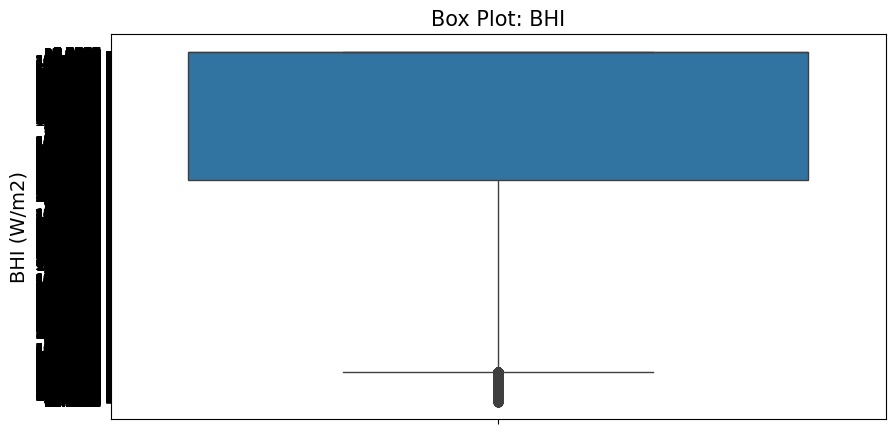

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(Berl_clean_df.BHI)
plt.title('Box Plot: BHI', fontsize=15)
plt.ylabel('BHI (W/m2)', fontsize=14)
plt.show()

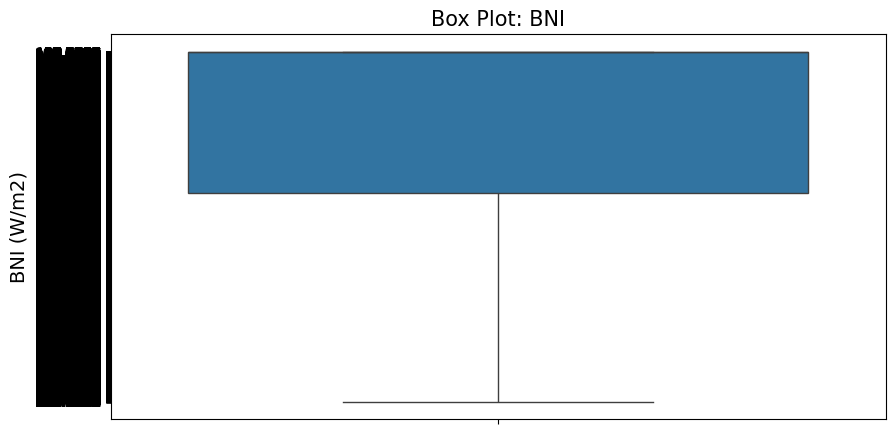

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(Berl_clean_df.BNI)
plt.title('Box Plot: BNI', fontsize=15)
plt.ylabel('BNI (W/m2)', fontsize=14)
plt.show()

LOF FOR BERLIN IRRADIATION

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Number of neighbors for LOF
n_neighbors = 20
contamination = 0.10
# Dictionary to store the percentage of outliers for each feature
outlier_percentages = {}

# Apply LOF to each feature
for feature in Berl_clean_df.columns:
# Reshape the data for LOF
 X = Berl_clean_df[[feature]].values

 # Fit the LOF model
 lof = LocalOutlierFactor(n_neighbors=n_neighbors)
 y_pred = lof.fit_predict(X)

 # Identify the outliers
 outliers = y_pred == -1

 # Calculate the percentage of outliers
 percentage_outliers = np.mean(outliers) * 100
 outlier_percentages[feature] = percentage_outliers

 print(f'Percentage of outliers Berlin irradiation in {feature}: {percentage_outliers:.2f}%')

Percentage of outliers Berlin irradiation in TOA: 0.03%
Percentage of outliers Berlin irradiation in Clear sky GHI: 0.01%
Percentage of outliers Berlin irradiation in Clear sky BHI: 0.09%
Percentage of outliers Berlin irradiation in Clear sky DHI: 0.01%
Percentage of outliers Berlin irradiation in Clear sky BNI: 0.01%
Percentage of outliers Berlin irradiation in GHI: 0.01%
Percentage of outliers Berlin irradiation in BHI: 0.13%
Percentage of outliers Berlin irradiation in DHI: 0.01%
Percentage of outliers Berlin irradiation in BNI: 0.08%


NAIVE BAYES MODEL ON IRRADIATION

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm

# Assuming clean_Osna_Irrad is your DataFrame loaded from your dataset
# Example steps to handle data types and missing values

# Step 1: Check and Convert Data Types
# Convert all columns to numeric (float64)
Berl_clean_df = Berl_clean_df.apply(pd.to_numeric, errors='coerce')

# Step 2: Handle Missing Values
Berl_clean_df = Berl_clean_df.dropna()  # Drop rows with NaN values

# Extract features
X = Berl_clean_df.values

# Fit Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X, np.zeros(X.shape[0]))  # Dummy target variable

# Calculate likelihoods for each data point
means = gnb.theta_
variances = np.var(X, axis=0) + 1e-9  # Adding a small value for numerical stability

likelihoods = np.zeros(X.shape[0])

# Ensure means and variances are in correct shape
if means.ndim == 1:
    means = means.reshape(1, -1)
if variances.ndim == 1:
    variances = variances.reshape(1, -1)

# Calculate likelihoods for each data point
for i, x in enumerate(X):
    likelihood = 1
    for j in range(X.shape[1]):
        likelihood *= norm.pdf(x[j], loc=means[0][j], scale=np.sqrt(variances[0][j]))
    likelihoods[i] = likelihood

# Determine anomalies
threshold = np.percentile(likelihoods, 10)  # for example, consider the bottom 10% as anomalies
anomalies = np.where(likelihoods < threshold)[0]

# Calculate percentage of anomalies for each feature
anomalies_Berl_clean_df = Berl_clean_df.iloc[anomalies]
total_anomalies = len(anomalies)
total_data_points = len(Berl_clean_df)

# Calculate anomaly percentage for each feature
feature_anomalies_percentage = {}
for feature in Berl_clean_df.columns:
    feature_anomalies_count = (anomalies_Berl_clean_df[feature] != Berl_clean_df[feature].mode().iloc[0]).sum()
    feature_anomalies_percentage[feature] = (feature_anomalies_count / total_data_points) * 100

print("Number of anomalies detected:", total_anomalies)
print("Percentage of anomalies for each feature:")
for feature, percentage in feature_anomalies_percentage.items():
    print(f"{feature}: {percentage:.2f}%")


Number of anomalies detected: 17530
Percentage of anomalies for each feature:
TOA: 10.00%
Clear sky GHI: 10.00%
Clear sky BHI: 10.00%
Clear sky DHI: 10.00%
Clear sky BNI: 10.00%
GHI: 10.00%
BHI: 9.98%
DHI: 10.00%
BNI: 9.98%


In [ ]:
Berl_clean = Berl_clean_df.select_dtypes(include=['object']).astype('float')
Berl_clean["GHI"] = Berl_clean_df["GHI"]
Berl_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175296 entries, 1546300800000 to 1704066300000
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TOA            175296 non-null  float64
 1   Clear sky GHI  175296 non-null  float64
 2   Clear sky BHI  175296 non-null  float64
 3   Clear sky DHI  175296 non-null  float64
 4   Clear sky BNI  175296 non-null  float64
 5   BHI            175296 non-null  float64
 6   DHI            175296 non-null  float64
 7   BNI            175296 non-null  float64
 8   GHI            175296 non-null  float64
dtypes: float64(9)
memory usage: 13.4+ MB


In [ ]:
Berl_clean_df.head()

,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,GHI,BHI,DHI,BNI
1546300800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1546301700000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1546302600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1546303500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1546304400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm


# Initialize a dictionary to store anomaly information for each feature
anomaly_info = {}

# Loop through each feature
for feature in Berl_clean.columns:
    # Extract the feature values
    X = Berl_clean[[feature]].values

    # Fit Gaussian Naive Bayes model
    gnb = GaussianNB()
    gnb.fit(X, np.zeros(X.shape[0]))  # Dummy target variable

    # Calculate likelihoods for each data point
    means = gnb.theta_
    variances = gnb.var_
    likelihoods = np.zeros(X.shape[0])

    # Ensure means and variances are in correct shape
    if means.ndim == 1:
        means = means.reshape(1, -1)
    if variances.ndim == 1:
        variances = variances.reshape(1, -1)

    # Calculate likelihoods for each data point
    for i, x in enumerate(X):
        likelihood = norm.pdf(x[0], loc=means[0][0], scale=np.sqrt(variances[0][0]))
        likelihoods[i] = likelihood

    # Determine anomalies using mean and standard deviation
    mean_likelihood = np.mean(likelihoods)
    std_likelihood = np.std(likelihoods)
    threshold = mean_likelihood - 2 * std_likelihood  # 2 standard deviations below the mean
    anomalies = np.where(likelihoods < threshold)[0]

    # Calculate percentage of anomalies for this feature
    total_anomalies = len(anomalies)
    total_data_points = len(Berl_clean_df)
    anomaly_percentage = (total_anomalies / total_data_points) * 100

    # Store the anomaly information
    anomaly_info[feature] = {
        'total_anomalies': total_anomalies,
        'anomaly_percentage': anomaly_percentage,
        'anomalies': anomalies
    }

# Print results
for feature, info in anomaly_info.items():
    print(f"Feature: {feature}")
    print(f"  Number of anomalies detected: {info['total_anomalies']}")
    print(f"  Percentage of anomalies: {info['anomaly_percentage']:.2f}%")



Feature: TOA
  Number of anomalies detected: 16252
  Percentage of anomalies: 9.27%
Feature: Clear sky GHI
  Number of anomalies detected: 17200
  Percentage of anomalies: 9.81%
Feature: Clear sky BHI
  Number of anomalies detected: 17399
  Percentage of anomalies: 9.93%
Feature: Clear sky DHI
  Number of anomalies detected: 13713
  Percentage of anomalies: 7.82%
Feature: Clear sky BNI
  Number of anomalies detected: 9818
  Percentage of anomalies: 5.60%
Feature: BHI
  Number of anomalies detected: 15663
  Percentage of anomalies: 8.94%
Feature: DHI
  Number of anomalies detected: 15836
  Percentage of anomalies: 9.03%
Feature: BNI
  Number of anomalies detected: 18766
  Percentage of anomalies: 10.71%
Feature: GHI
  Number of anomalies detected: 17108
  Percentage of anomalies: 9.76%


AUTOENCODER FOR IRRADIATION DATASET

In [ ]:
Berl_df_irrad.head()
Berl_df_irrad = Berl_df_irrad.drop(columns=["Reliability", "cityName", "time","Observation period"])
Berl_df_irrad.head()


,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,GHI,BHI,DHI,BNI
1546300800000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546301700000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546302600000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546303500000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546304400000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential



#to save all features
features_auto_i = Berl_df_irrad.columns.tolist()


# DataFrame to store anomaly scores for each feature
anomaly_scores_auto_i = pd.DataFrame(index=Berl_df_irrad.index)

# Loop through each feature
for feature in features_auto_i :
    # Scale the feature data
    scaler = MinMaxScaler()
    scaled_feature_auto_i  = scaler.fit_transform(Berl_df_irrad[[feature]])

    # Define the autoencoder model
    model_auto_i  = Sequential([
        Dense(32, activation='relu', input_shape=(1,)),
        Dense(16, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model_auto_i .compile(optimizer='adam', loss='mean_squared_error')

     #Train the autoencoder
    model_auto_i.fit(scaled_feature_auto_i , scaled_feature_auto_i , epochs=50, batch_size=32, validation_split=0.1, verbose=0)

    # Get reconstruction loss
    reconstructed_feature_auto_i  = model_auto_i.predict(scaled_feature_auto_i)
    reconstruction_loss_auto_i  = np.mean(np.square(scaled_feature_auto_i  - reconstructed_feature_auto_i), axis=1)

    # Store the reconstruction loss (anomaly score) in the DataFrame
    anomaly_scores_auto_i [feature] = reconstruction_loss_auto_i



In [ ]:

print(reconstruction_loss_auto_i)
# Calculate the threshold as the 90th percentile of the reconstruction loss
threshold_auto_i = np.percentile(reconstruction_loss_auto_i, 90)

    # Identify anomalies
anomalies_auto_i = reconstruction_loss_auto_i > threshold_auto_i

for feature in features_auto_i:
    anomalies_auto_i = anomaly_scores_auto_i[feature] > threshold_auto_i
    anomaly_percentage_auto_i = np.mean(anomalies_auto_i) * 100
    print(f'Feature: {feature}, Anomaly Percentage: {anomaly_percentage_auto_i:.2f}%')


    # Store the reconstruction loss (anomaly score) in the DataFrame
anomaly_scores_auto_i[feature] = reconstruction_loss_auto_i


# Combine anomaly scores with original data for easier analysis
combined_data_auto_i = pd.concat([berl_df, anomaly_scores_auto_i.add_suffix('_anomaly_score')], axis=1)

# Save the combined data with anomaly scores
combined_data_auto_i.to_csv('berl_df_with_anomaly_scores_auto_i.csv', index=False)

# Display the first few rows of the combined data
combined_data_auto_i.head()






XGBOOST ON IRRADIATION DATASET

In [ ]:
mask = Berl_df_irrad["GHI"] ==0.0
(len(Berl_df_irrad[mask])/len(Berl_df_irrad)) *100


48.79632165023731

In [ ]:

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Sample Data (Replace with your dataset)
# Assuming a dataframe with 100 rows and 10 features


# Define anomaly detection function
def detect_anomalies(Mun_df):
    anomalies = pd.DataFrame(index=Mun_df.index)
    anomaly_percentages = {}

    for feature in Mun_df.columns:
        X = Mun_df.drop(columns=[feature])
        y = Mun_df[feature]

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train XGBoost model
        model = XGBRegressor()
        model.fit(X_train, y_train)

        # Predict on the whole dataset
        y_pred = model.predict(X)

        # Calculate prediction errors
        errors = np.abs(y - y_pred)

        # Determine dynamic threshold using standard deviation
        mean_error = np.mean(errors)
        std_error = np.std(errors)
        threshold = mean_error + 2 * std_error  # Consider 2 standard deviations from the mean

        # Flag anomalies
        anomaly_flags = errors > threshold
        anomalies[feature] = anomaly_flags

        # Calculate anomaly percentage
        anomaly_percentages[feature] = (anomaly_flags.sum() / len(Mun_df)) * 100

        # Print summary
        print(f"Feature: {feature}")
        print(f"Threshold: {threshold:.4f}")
        print(f"Anomalies detected: {anomaly_flags.sum()}/{len(Mun_df)} ({anomaly_percentages[feature]:.2f}%)")
        print("-" * 40)

    return anomalies, anomaly_percentages

# Detect anomalies
anomalies_df, anomaly_percentages = detect_anomalies(Berl_clean)


# Print anomaly percentages
print("\nAnomaly Percentages per Feature:")
for feature, percentage in anomaly_percentages.items():
    print(f"{feature}: {percentage:.2f}%")


Feature: TOA
Threshold: 2.0156
Anomalies detected: 9786/175296 (5.58%)
----------------------------------------
Feature: Clear sky GHI
Threshold: 0.9876
Anomalies detected: 10002/175296 (5.71%)
----------------------------------------
Feature: Clear sky BHI
Threshold: 0.8808
Anomalies detected: 10147/175296 (5.79%)
----------------------------------------
Feature: Clear sky DHI
Threshold: 1.2664
Anomalies detected: 9765/175296 (5.57%)
----------------------------------------
Feature: Clear sky BNI
Threshold: 4.1113
Anomalies detected: 10224/175296 (5.83%)
----------------------------------------
Feature: BHI
Threshold: 0.9158
Anomalies detected: 8976/175296 (5.12%)
----------------------------------------
Feature: DHI
Threshold: 1.1674
Anomalies detected: 8943/175296 (5.10%)
----------------------------------------
Feature: BNI
Threshold: 2.5123
Anomalies detected: 8872/175296 (5.06%)
----------------------------------------
Feature: GHI
Threshold: 1.1309
Anomalies detected: 8328/17529